In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_parquet("exports/tables/fact_rentals.parquet")

In [4]:
print(f"Données chargées : {df.shape[0]} locations.")

Données chargées : 16044 locations.


In [5]:
reference_date = df['rental_date'].max() + pd.Timedelta(days=1)

In [6]:
# Agrégation par client
customer_data = df.groupby('customer_id').agg({
    'rental_date': lambda x: (reference_date - x.max()).days, # Recency
    'rental_id': 'count',                                     # Frequency
    'rental_rate': 'sum'                                      # Monetary
}).rename(columns={
    'rental_date': 'recency',
    'rental_id': 'frequency',
    'rental_rate': 'monetary'
})

In [7]:
print(customer_data.head())

             recency  frequency  monetary
customer_id                              
1                176         32     93.68
2                175         27     82.73
3                176         26     85.74
4                176         22     63.78
5                  1         38     99.62


In [8]:
# 1. Mise à l'échelle
scaler = StandardScaler()

In [9]:
scaled_features = scaler.fit_transform(customer_data)

In [10]:
# 2. Application de K-Means (on choisit 3 segments)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
customer_data['cluster'] = kmeans.fit_predict(scaled_features)

In [11]:
# 3. Nommer les segments pour le rapport
cluster_map = {0: 'Clients Fidèles', 1: 'Clients Occasionnels', 2: 'Clients à Relancer'}
customer_data['segment_name'] = customer_data['cluster'].map(cluster_map)

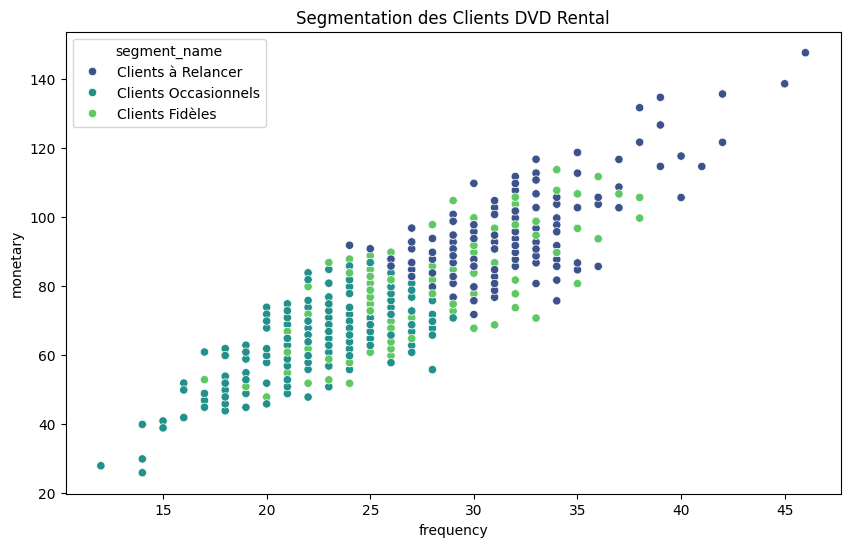

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='frequency', y='monetary', hue='segment_name', palette='viridis')
plt.title('Segmentation des Clients DVD Rental')
plt.show()

In [13]:
# Sauvegarde du résultat final dans exports
customer_data.to_csv("exports/results/customer_segmentation_results.csv", index=True)

print("✅ Analysis successfully exported to exports/results/ml_customer_segments.csv")

✅ Analysis successfully exported to exports/results/ml_customer_segments.csv
